## STANDARD RESULTS ##

In [2]:
import os
import torch
import numpy as np


from CODE.AttentionDCA_python.src.utils import quickread

def read_tensor_from_txt(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    # Read the dimensions from the first line
    dims = list(map(int, lines[0].strip().split()))
    
    # Initialize a list to hold the tensor data
    tensor_data = []
    
    current_slice = []
    for line in lines[1:]:
        line = line.strip()
        if line.startswith("Slice"):
            if current_slice:  # If there is an existing slice, save it
                tensor_data.append(current_slice)
                current_slice = []
        elif line:  # Process non-empty lines
            current_slice.append(list(map(float, line.split(','))))
    
    if current_slice:  # Append the last slice
        tensor_data.append(current_slice)
    
    # Convert the list back into a tensor with the original dimensions
    tensor = torch.tensor(tensor_data).view(*dims)
    return tensor


cwd = os.getcwd()
print(cwd)

filename = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_174_train.fasta'
structfile = cwd + '/CODE/DataAttentionDCA/data/lisa_data/HK-RR_maybe174.dat'

Z, W = quickread(filename)
W = W / W.sum()
q = int(Z.max()) + 1
N, M = Z.shape

/home/ale_durso/Documents/EPFL/MA5/master_project/Attention DCA
Total sequences read: 19999
Sequences after filtering: 19999
Sampling 100000 pairs out of 89719710 total pairs.
Mean fraction of identical positions (sampled): 0.308344367816092
Computed theta: 0.3943642650626482


100%|██████████| 13396/13396 [00:09<00:00, 1459.94it/s]

3120.38049577372


In [30]:
family = 'HKRR_std'
H = 64
d= 10
N = 174
n_epochs = 500
loss_type = 'without_J'
Kstd_32_23 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Qstd_32_23 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Vstd_32_23 = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

In [31]:
from CODE.AttentionDCA_python.src.dcascore import score
from CODE.AttentionDCA_python.src.model import AttentionModel
model = AttentionModel(H,d,N,q)
model.Q.data = Qstd_32_23
model.K.data = Kstd_32_23
model.V.data = Vstd_32_23
ranking_std_32_23, _ = score(model, Qstd_32_23, Kstd_32_23, Vstd_32_23)

174


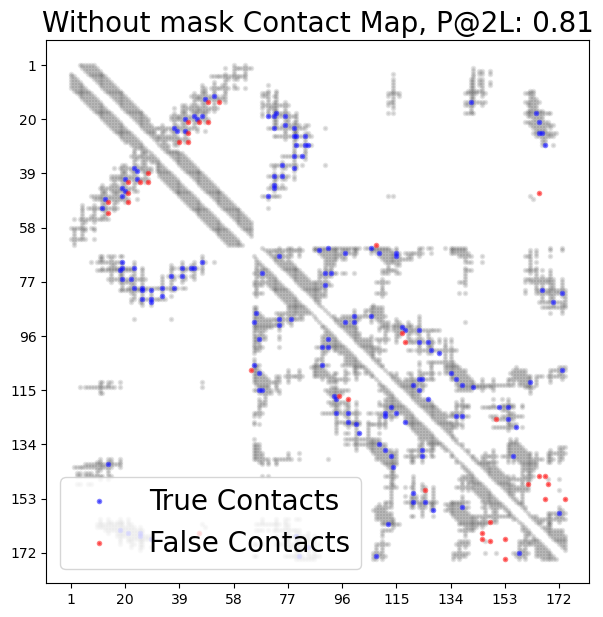

In [32]:

from CODE.AttentionDCA_python.src.plot_functions import contact_plot
ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)
number_predictions = 100
# Call the contact_plot function

figurename = 'Without mask'
fake32_23_wo_mask = contact_plot(ranking_std_32_23, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")



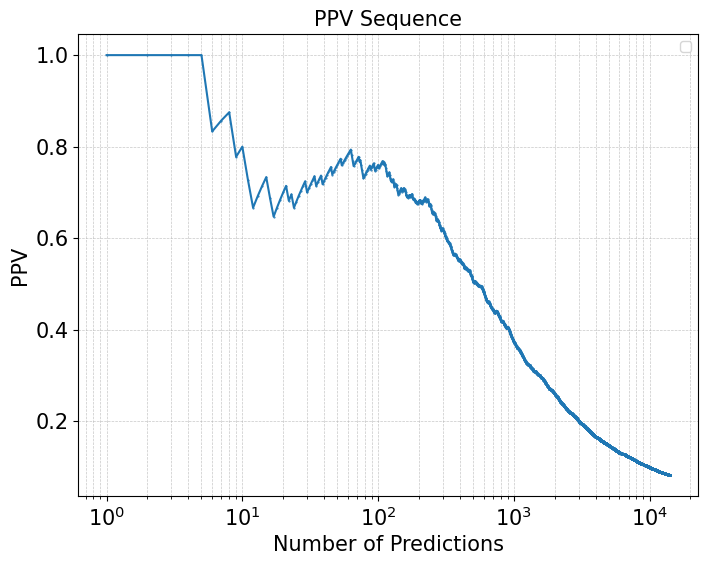

In [33]:
from CODE.AttentionDCA_python.src.plot_functions import  graphPPV
from CODE.AttentionDCA_python.src.dcascore import compute_PPV
ppv_inter_w_mask  =compute_PPV(ranking_std_32_23, structfile)


PPVs = [ ppv_inter_w_mask]

labels = ["Without mask"]
figtitle = "PPV Sequence"

graphPPV(  PPVs, labels, figtitle )

## WITH MASKS RESULTS ##

In [7]:
family = 'HKRR_masked_22_26_16'
H = 64
d= 10
n_epochs = 500
loss_type = 'without_J'
Kstd_32_23_masked = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/K_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Qstd_32_23_masked = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/Q_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))
Vstd_32_23_masked = read_tensor_from_txt( cwd +"/results/{H}_{d}_{family}_{losstype}_{n_epochs}/V_tensor.txt".format(H=H, d=d, family=family, losstype=loss_type, n_epochs=n_epochs))

In [8]:
from CODE.AttentionDCA_python.src.dcascore import score
from CODE.AttentionDCA_python.src.model import AttentionModel
H1 = 22
H2 = 26 + H1
domain1_end = 62

modelmasked = AttentionModel(H,d,N,q, index_last_domain1=domain1_end, H1=H1, H2=H2)
modelmasked.Q.data = Qstd_32_23_masked
modelmasked.K.data = Kstd_32_23_masked
modelmasked.V.data = Vstd_32_23_masked
ranking_std_32_23_masked, _ = score(modelmasked, Qstd_32_23_masked, Kstd_32_23_masked, Vstd_32_23_masked, index_last_domain1=domain1_end, H1=H1, H2=H2, A=None)

174


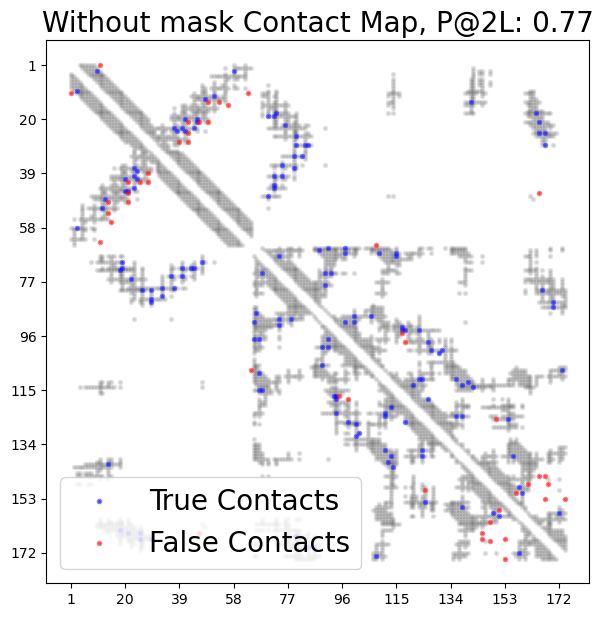

In [9]:
#N = 100  # Number of top predictions to consider
from CODE.AttentionDCA_python.src.plot_functions import contact_plot
ticks = np.arange(1, N+1, 19)  # Example tick positions
num = int(N)
print(N)
number_predictions = 100
# Call the contact_plot function

figurename = 'Without mask'
fake32_23_wo_mask = contact_plot(ranking_std_32_23_masked, structfile, number_predictions, figurename, ticks=ticks, min_separation=2, cutoff=10.0, N="2L")

